In [166]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [168]:
# laoding the dataset
data = pd.read_csv('Energy data.csv')
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [170]:
# Converting data into dataframe
df = pd.DataFrame(data)

In [172]:
# Dropping 'Date' column
df = df.drop(columns=['date','lights'])

In [174]:
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


## Basic statistics and EDA

In [177]:
df.head()    #shows top 5 rows

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [179]:
df.tail()    #shows bottom 5 rows

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,...,23.2,46.7900,22.7,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,...,23.2,46.7900,22.6,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,...,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,...,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784
19734,430,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,...,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851


In [181]:
df.info()   # shows structure and contents of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [183]:
df.isnull().sum()    #checking for null values

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [185]:
df.describe()     # descriptive statistics for all numeric columns in the DataFrame

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [187]:
df.duplicated().sum()     # checking for duplicate rows

0

In [189]:
# select only numeric columns from the DataFrame

num_columns = df.select_dtypes(include = 'number')
num_columns

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


## Outlier Detection and Treatment

<Axes: >

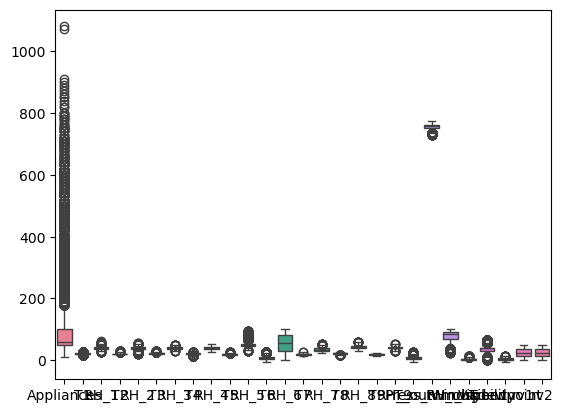

In [192]:
# plotting boxplots for all numeric columns in the DataFrame 

sns.boxplot(data = df)

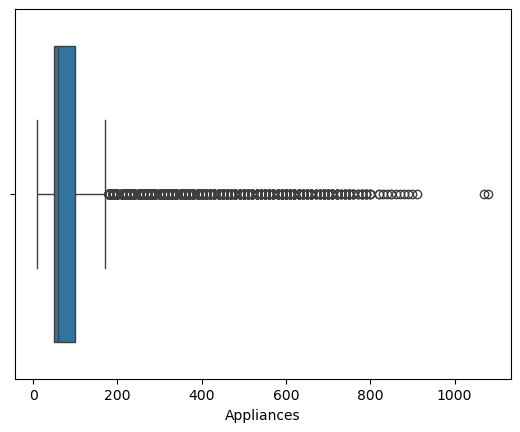

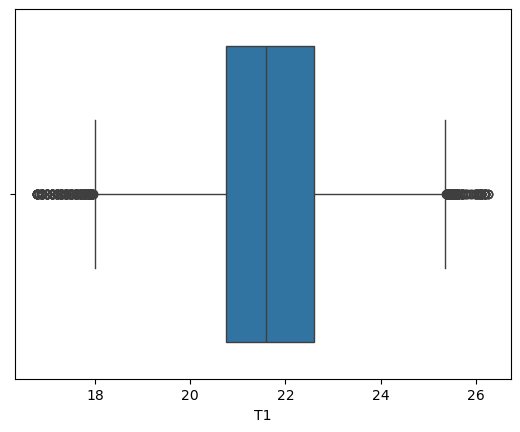

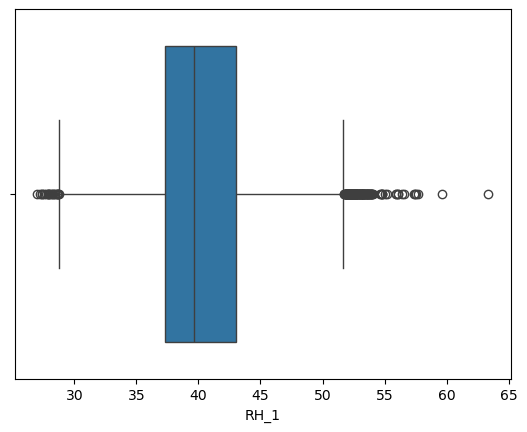

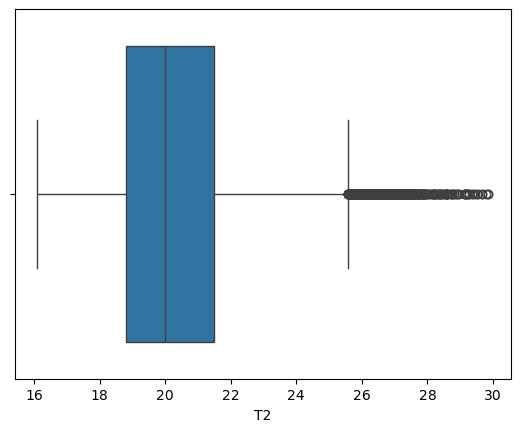

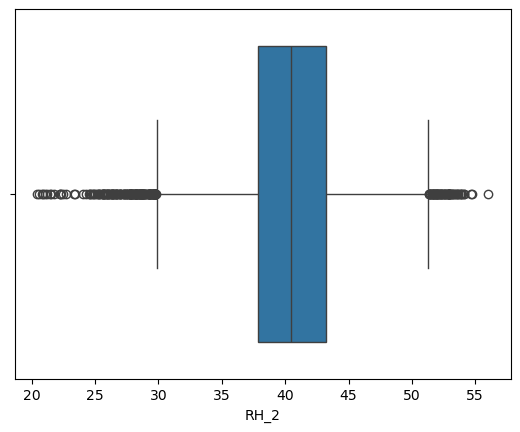

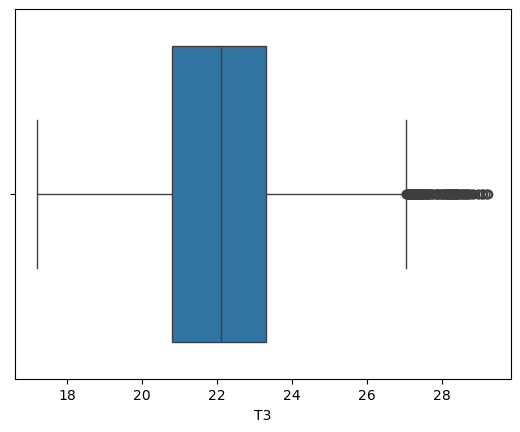

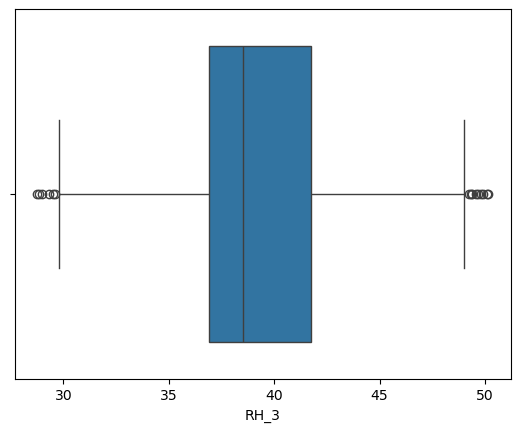

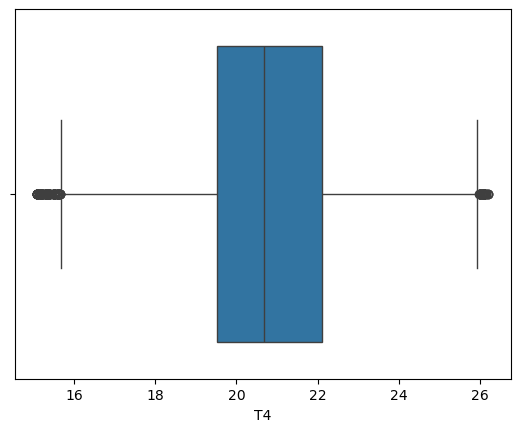

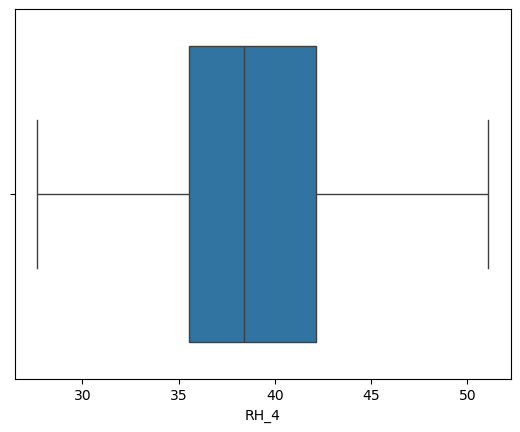

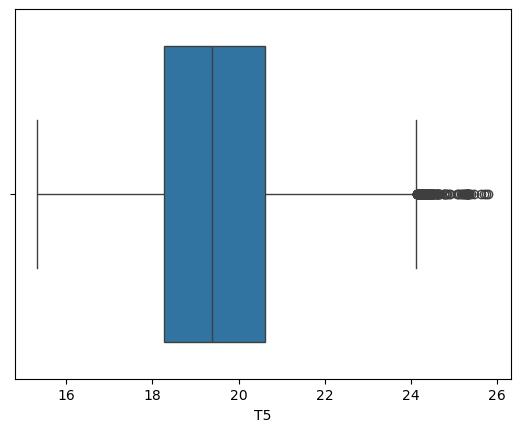

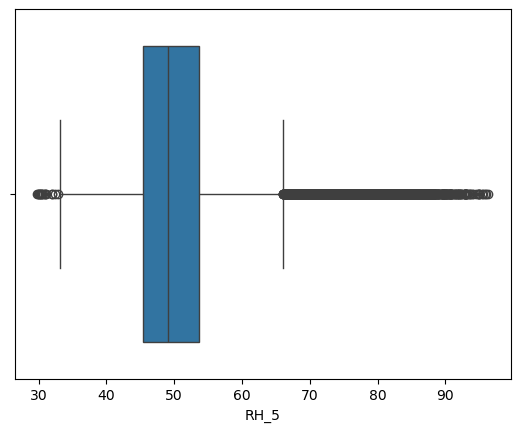

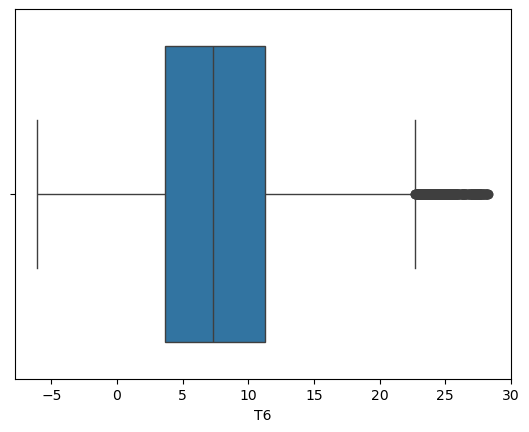

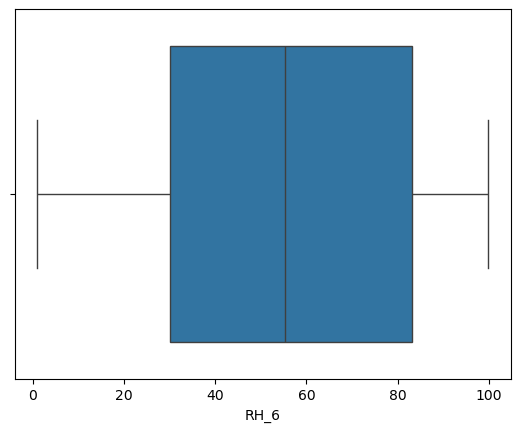

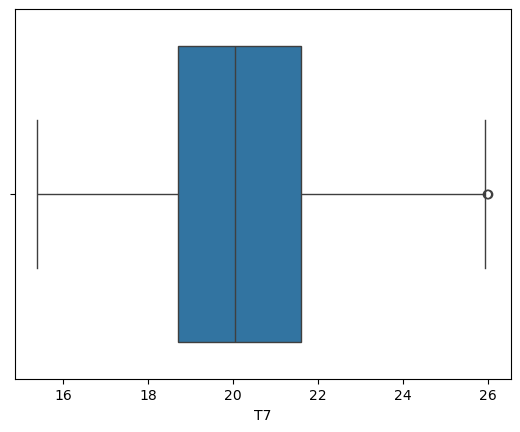

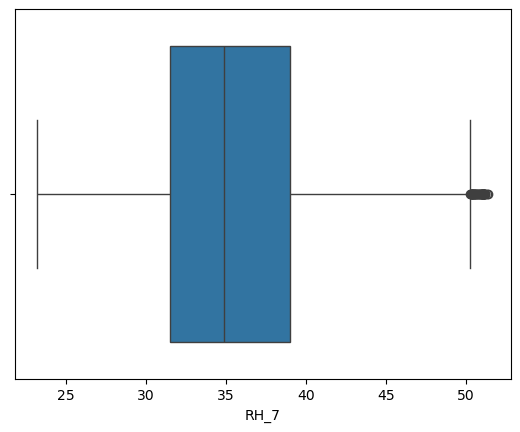

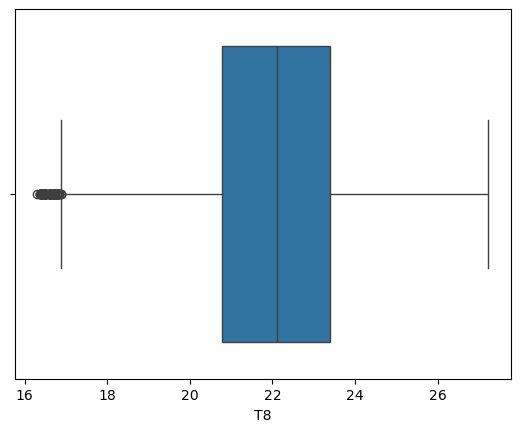

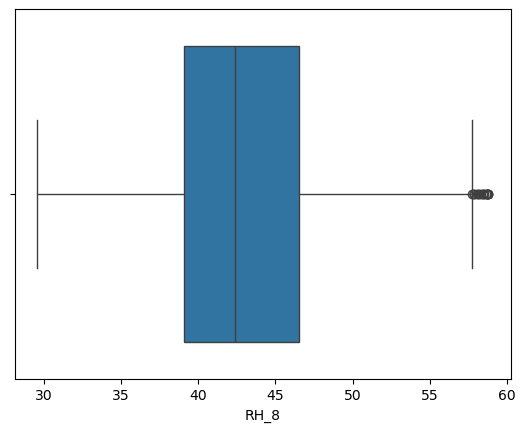

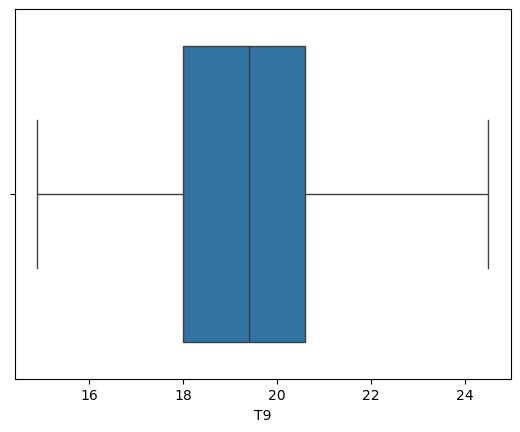

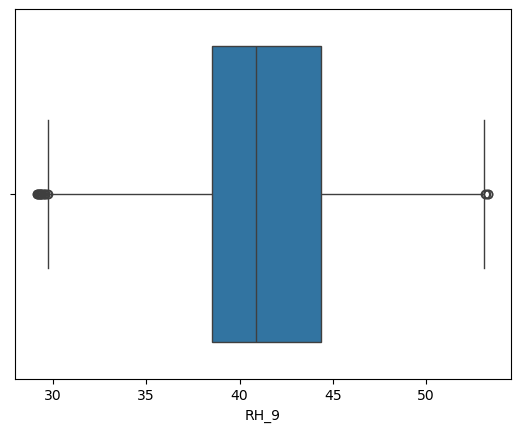

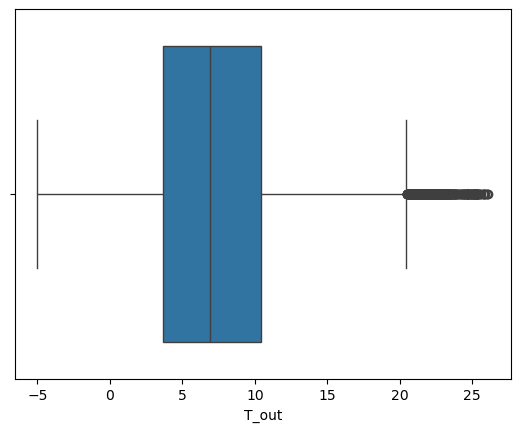

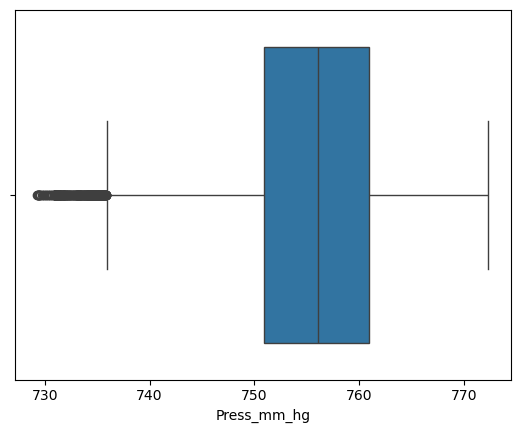

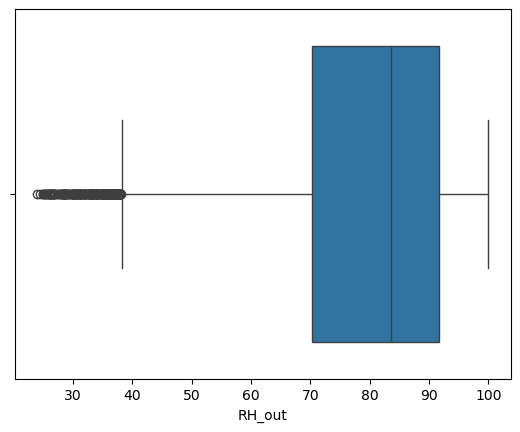

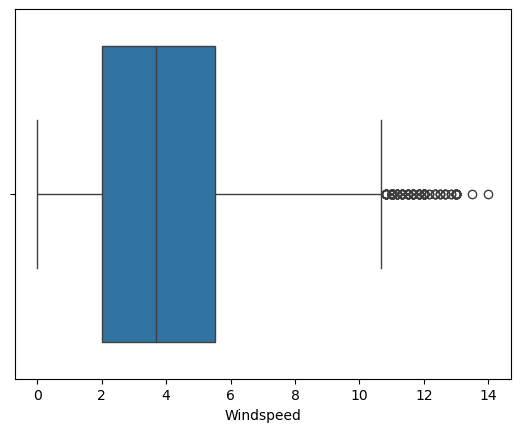

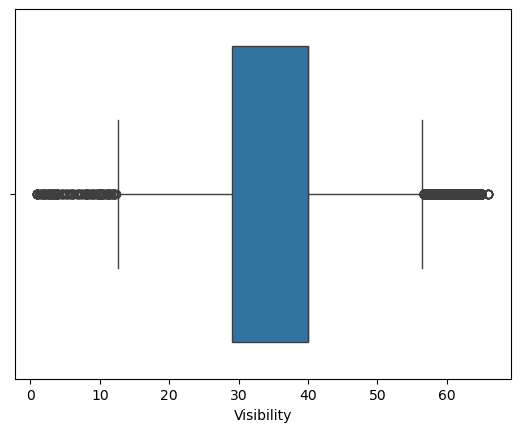

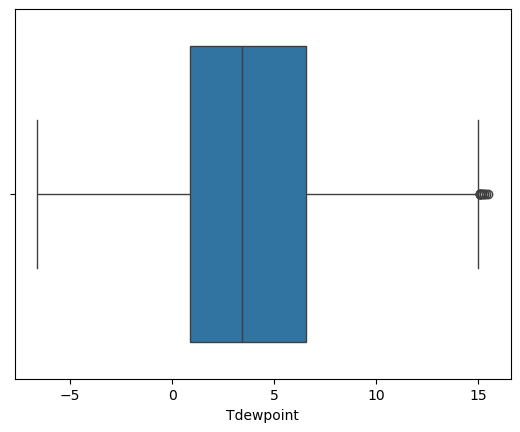

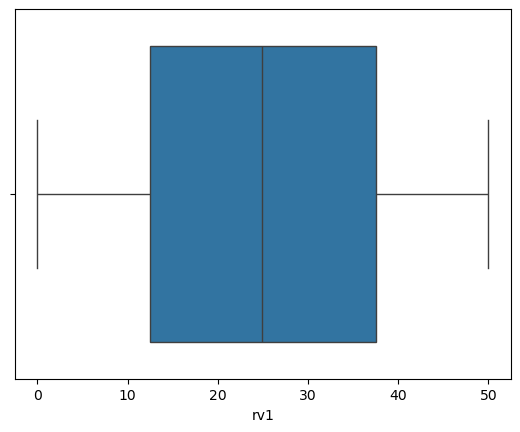

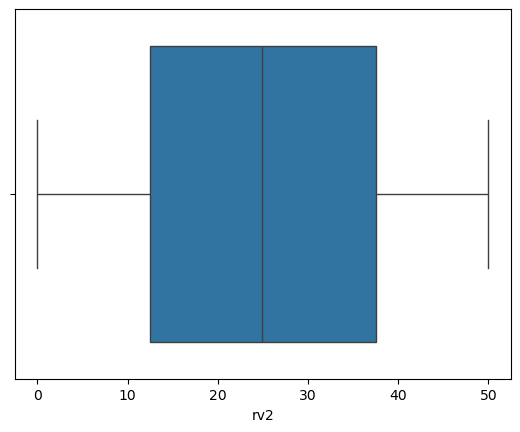

In [193]:
# generating individual boxplots for each numeric column

for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [195]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df 

In [196]:
df_new = outliers(df)    # new dataframe

In [197]:
df_new.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.60,735.933333,92.0,7.000000,56.500000,5.3,13.275433,13.275433
1,60.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.48,735.933333,92.0,6.666667,56.500000,5.2,18.606195,18.606195
2,50.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.37,735.933333,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.25,735.933333,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,60.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.13,735.933333,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<Axes: >

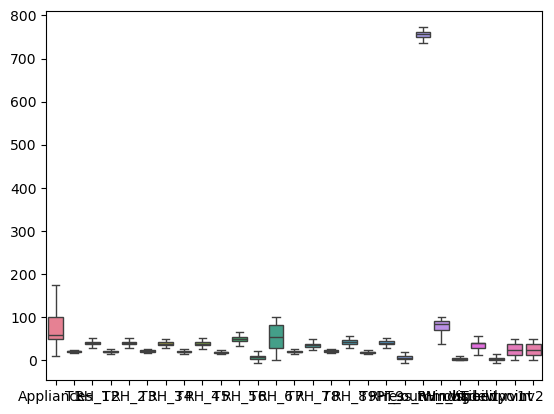

In [202]:
sns.boxplot(data = df_new)     # plotting boxplots for all numeric columns in the DataFrame 

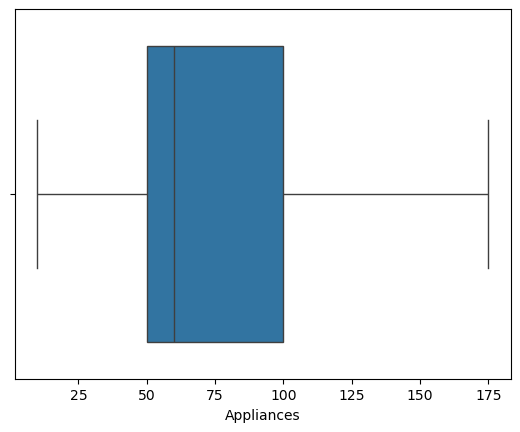

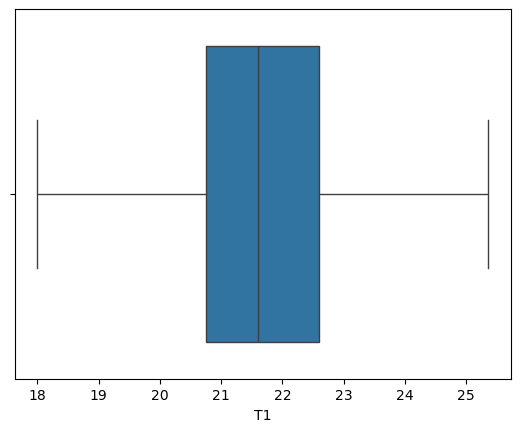

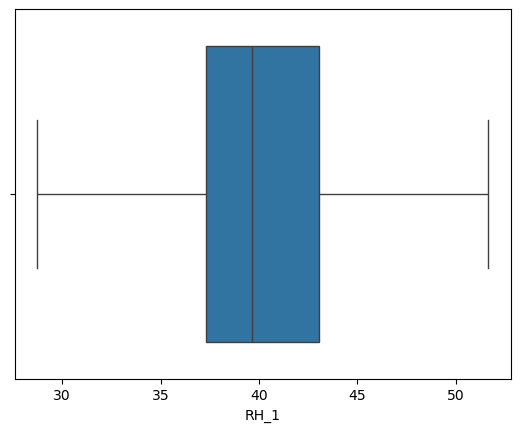

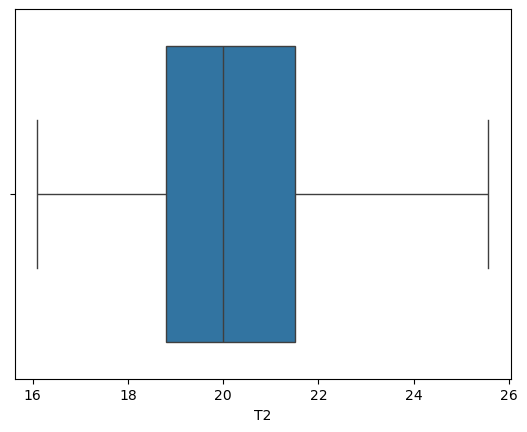

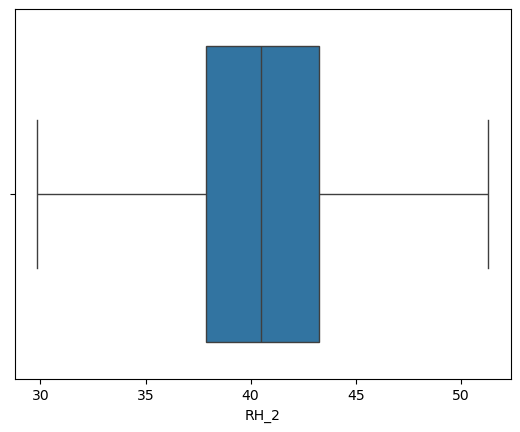

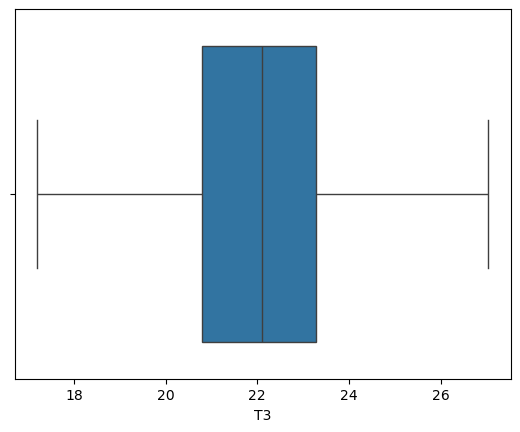

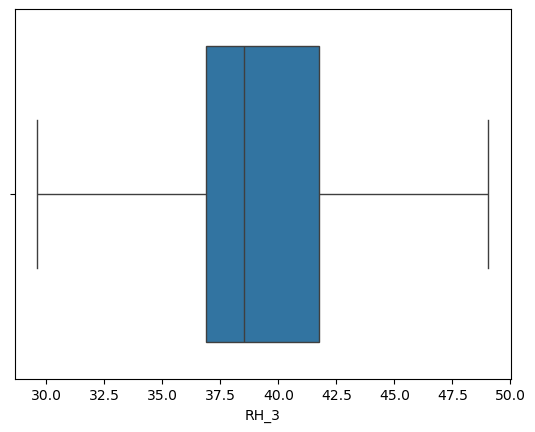

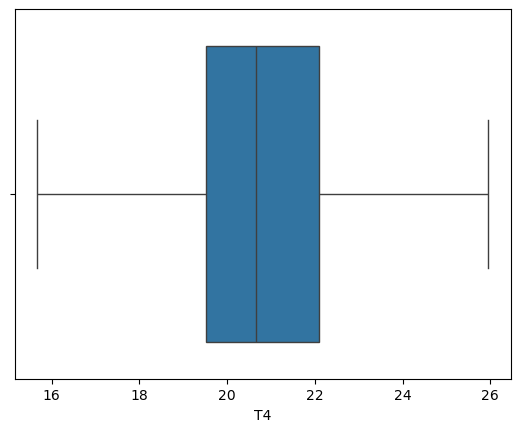

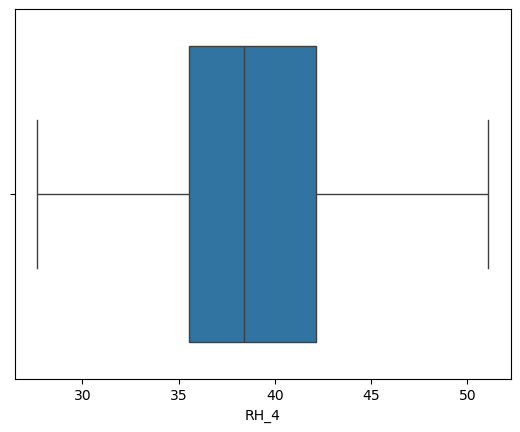

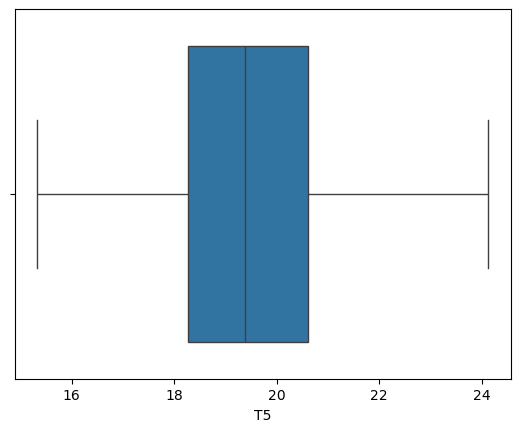

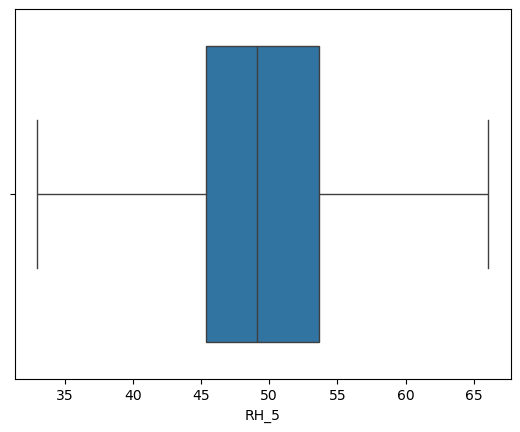

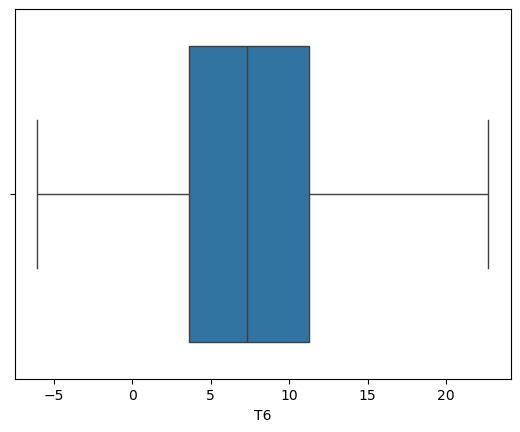

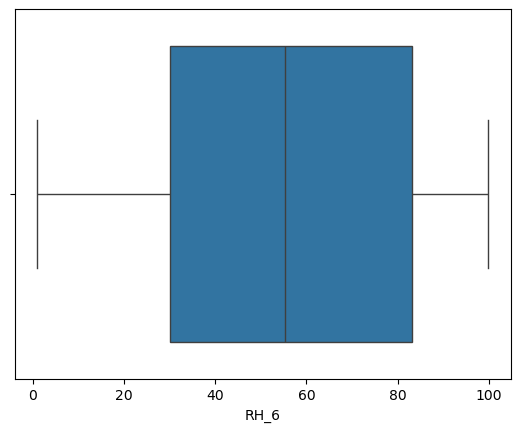

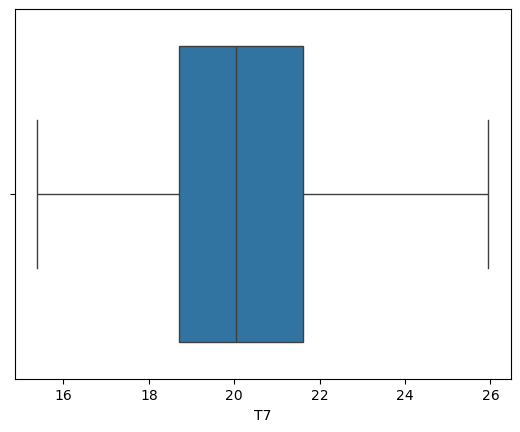

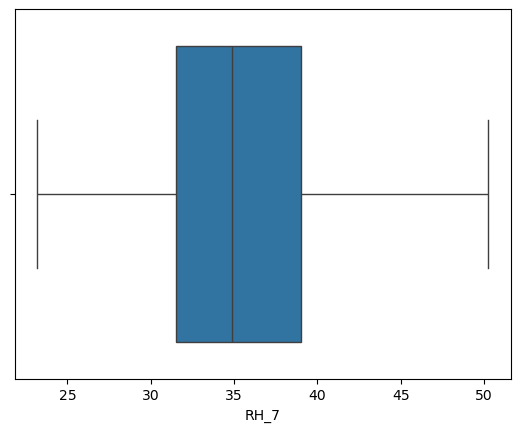

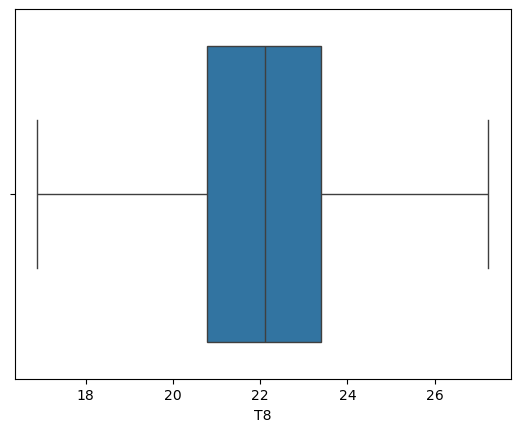

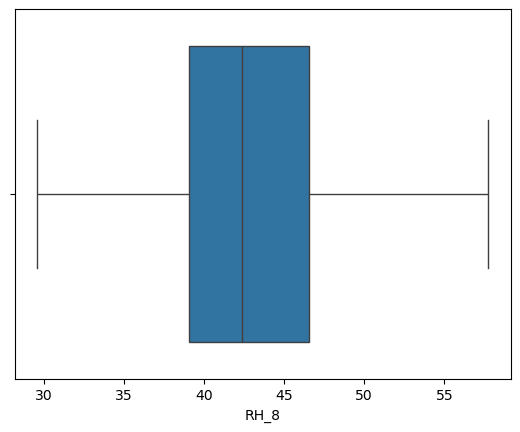

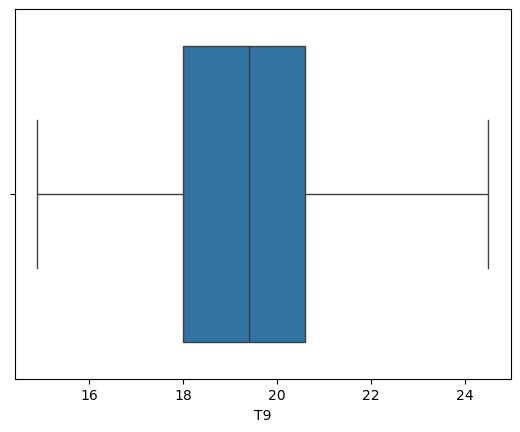

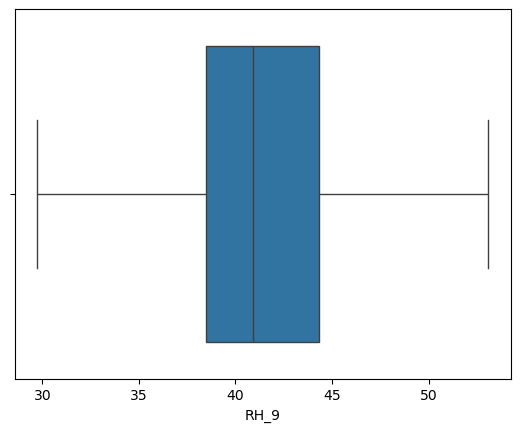

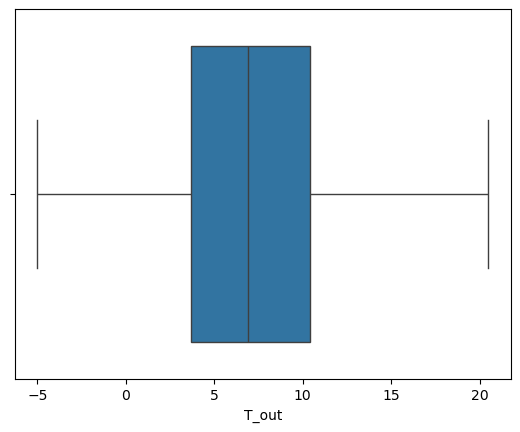

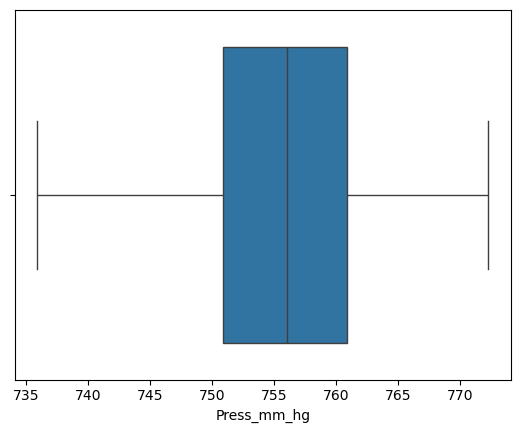

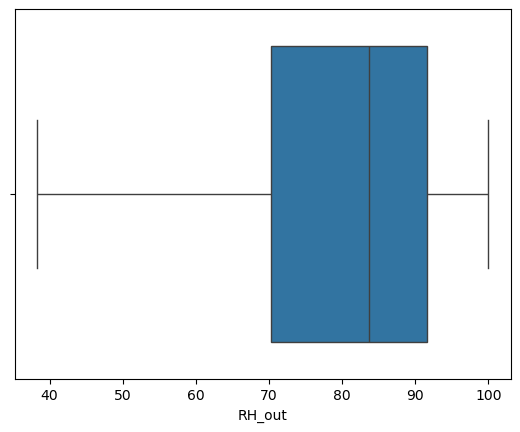

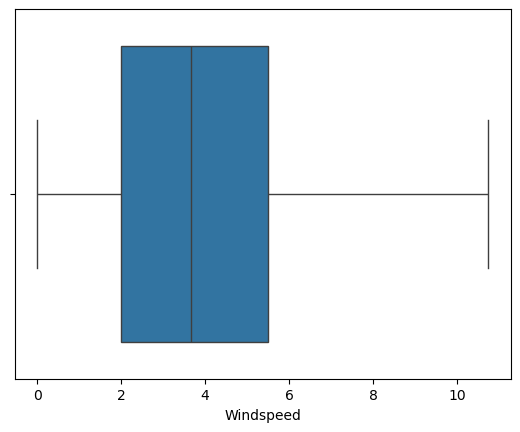

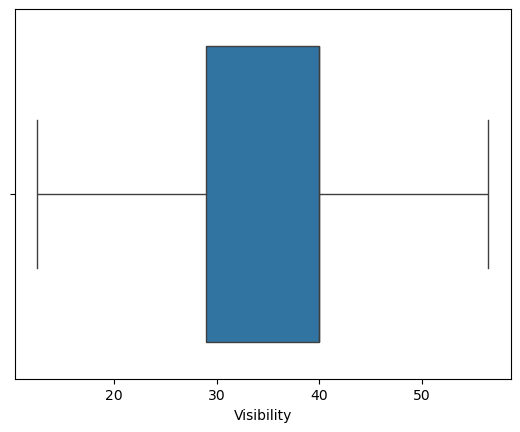

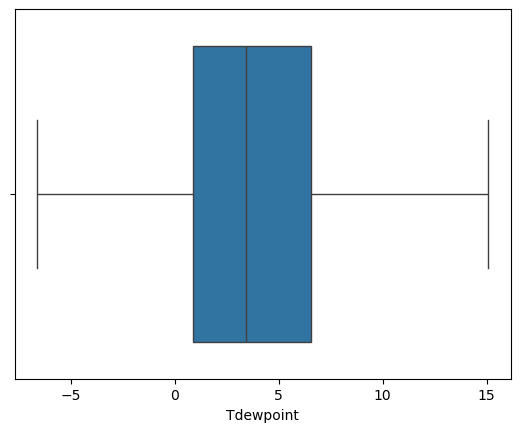

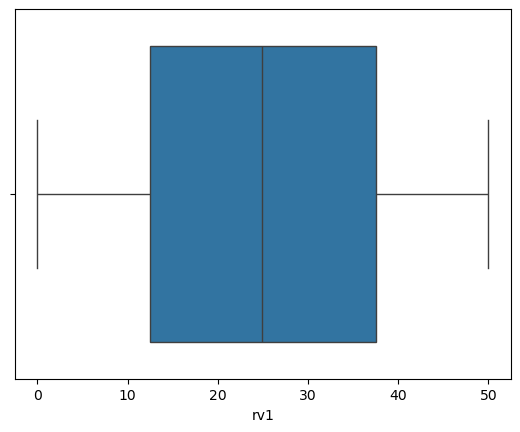

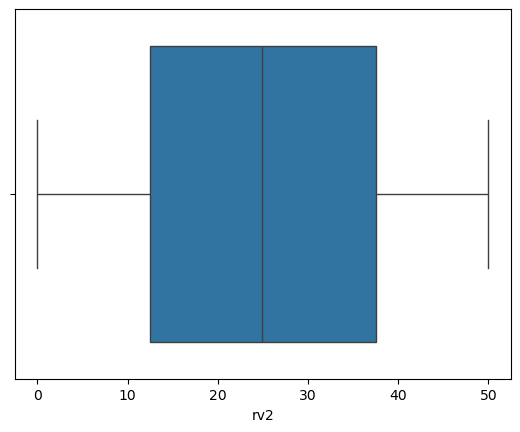

In [203]:
# generating individual boxplots for each numeric column

for i in num_columns.columns:
    sns.boxplot(data=df_new,x=i)
    plt.show()

## Skewness

In [206]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  float64
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [209]:
X = df_new.drop(columns = 'Appliances', axis = 1)
y = df_new['Appliances']

In [211]:
from sklearn.preprocessing import PowerTransformer

In [213]:
pt = PowerTransformer(method='yeo-johnson')

In [215]:
numerical_col = df_new.select_dtypes(include= 'number').columns

In [217]:
df_new[numerical_col] = pt.fit_transform(df_new[numerical_col])
print(df_new[numerical_col].skew())

Appliances     0.005534
T1            -0.000159
RH_1           0.005847
T2             0.022846
RH_2          -0.000620
T3             0.004755
RH_3           0.029135
T4            -0.000010
RH_4           0.032063
T5             0.003958
RH_5           0.010572
T6             0.077813
RH_6          -0.425103
T7             0.001656
RH_7          -0.004790
T8            -0.016761
RH_8           0.003277
T9             0.007446
RH_9           0.005476
T_out          0.046791
Press_mm_hg   -0.020158
RH_out        -0.253118
Windspeed     -0.008516
Visibility    -0.024609
Tdewpoint      0.030539
rv1           -0.244695
rv2           -0.244695
dtype: float64


In [219]:
numerical_col = [i for i in numerical_col if i in X.columns]

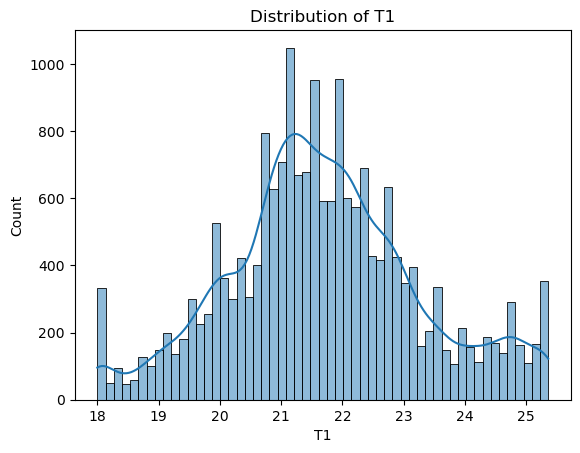

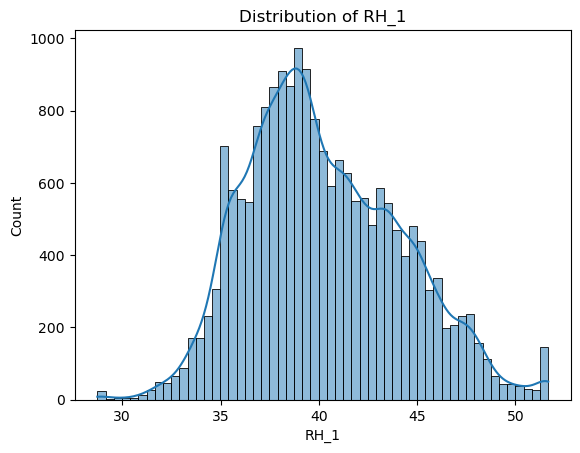

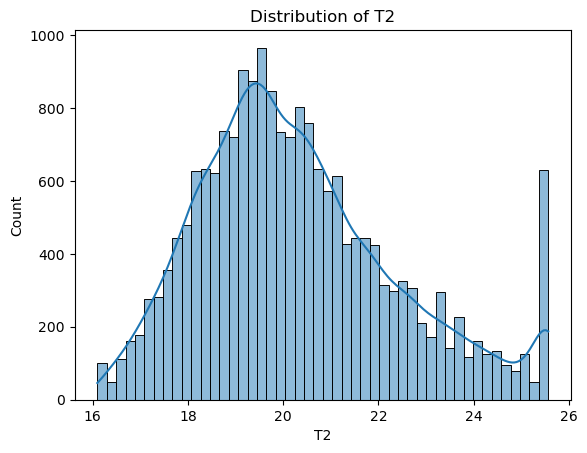

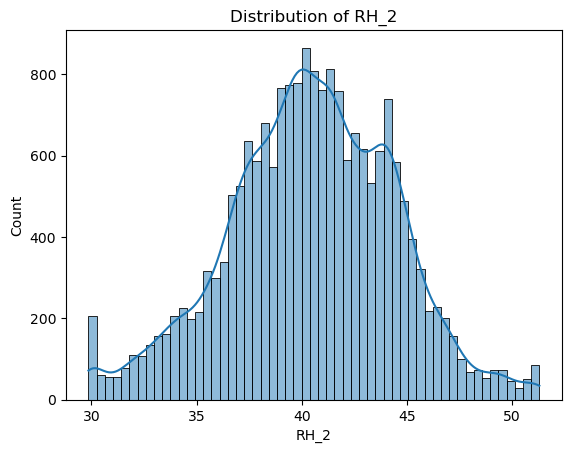

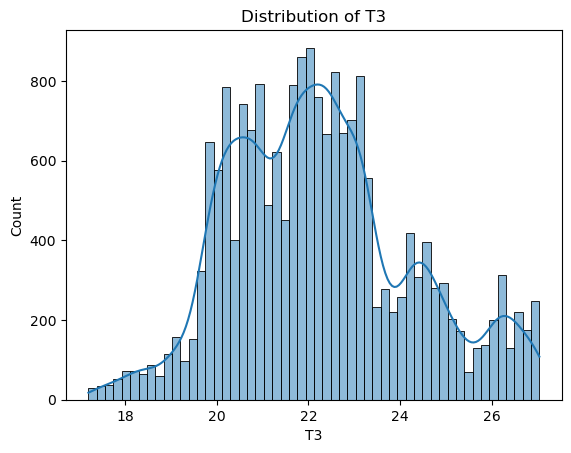

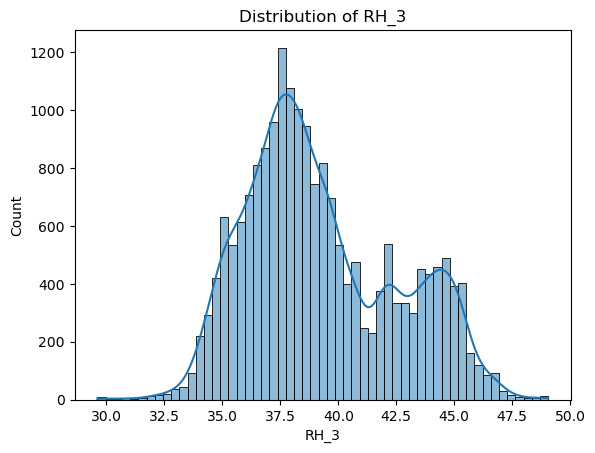

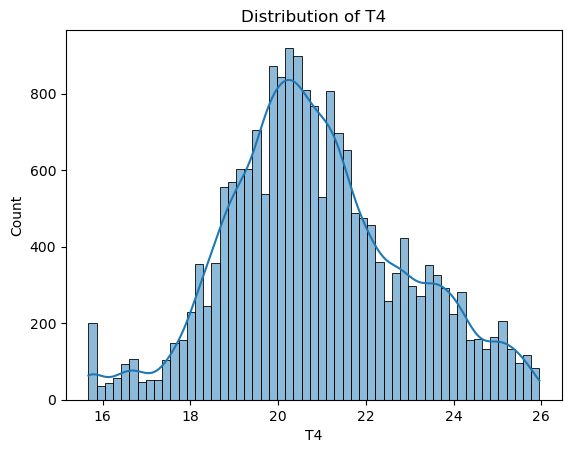

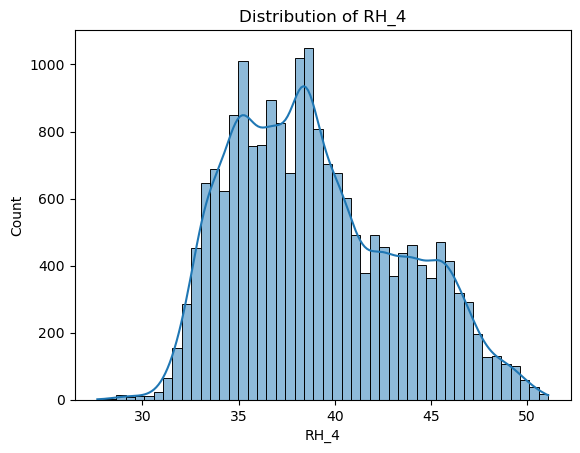

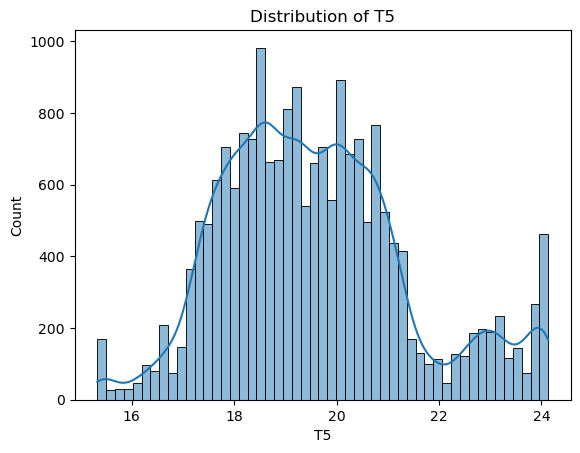

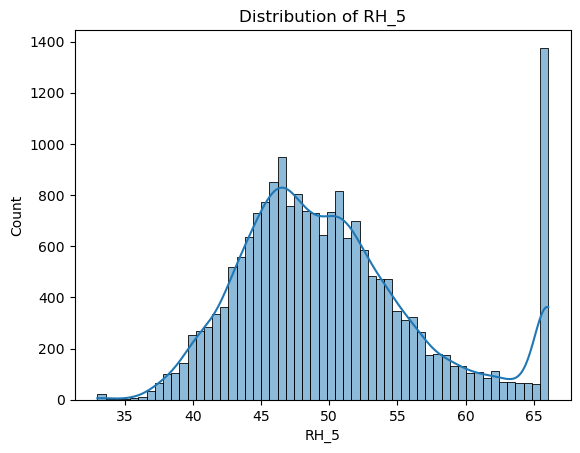

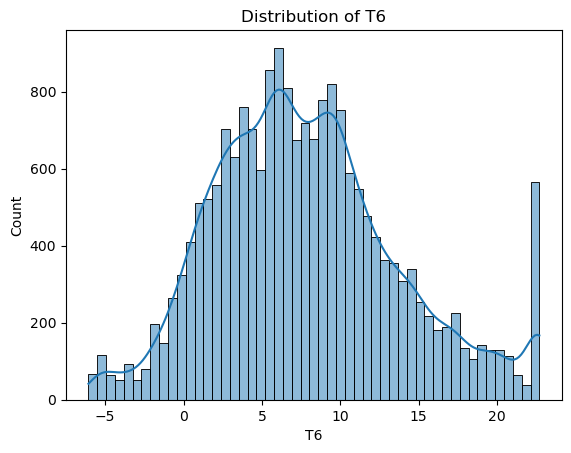

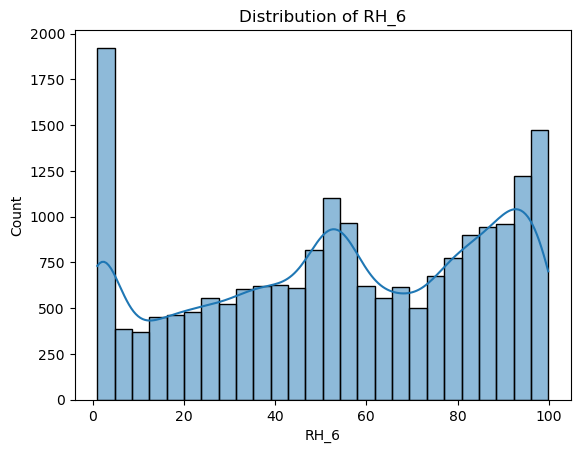

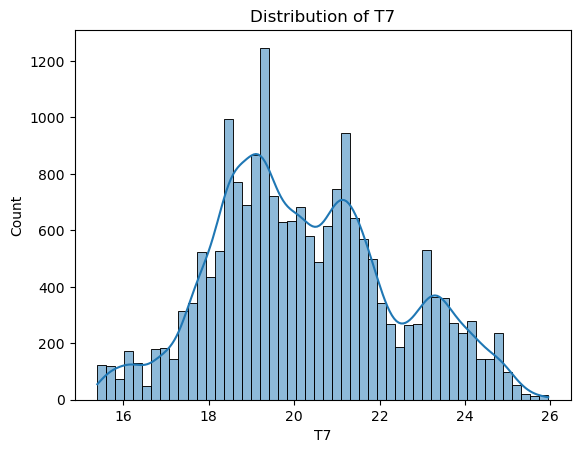

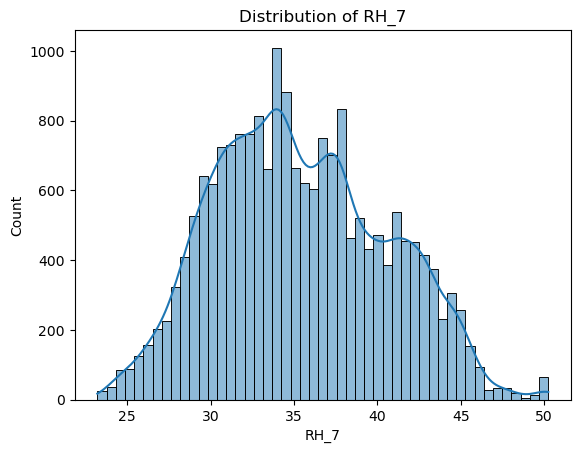

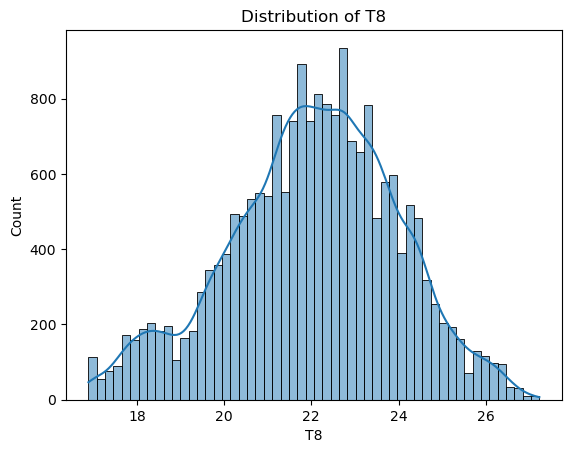

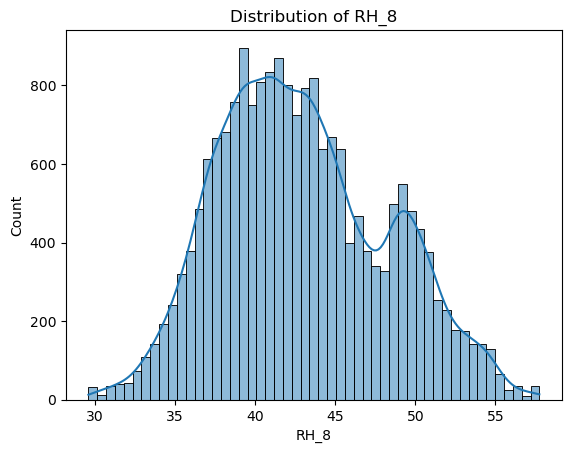

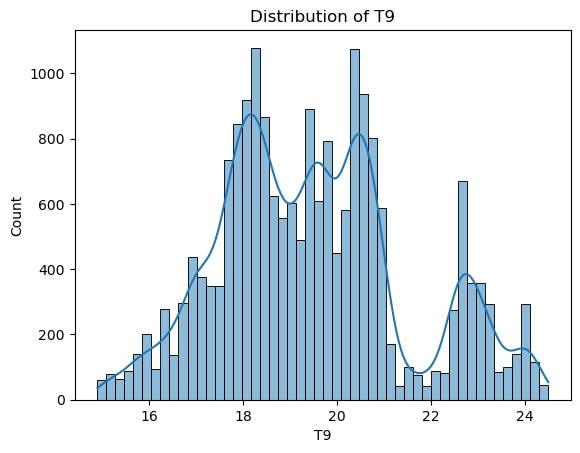

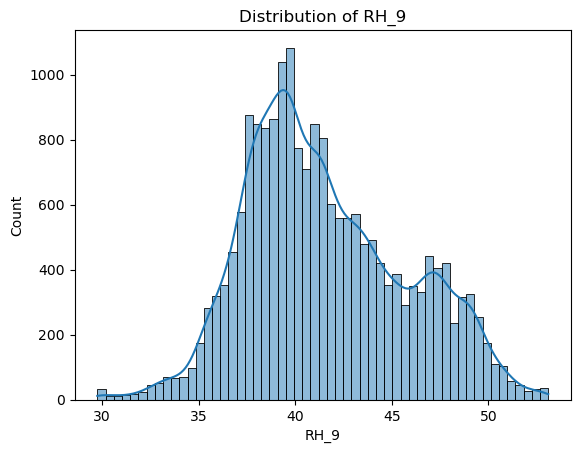

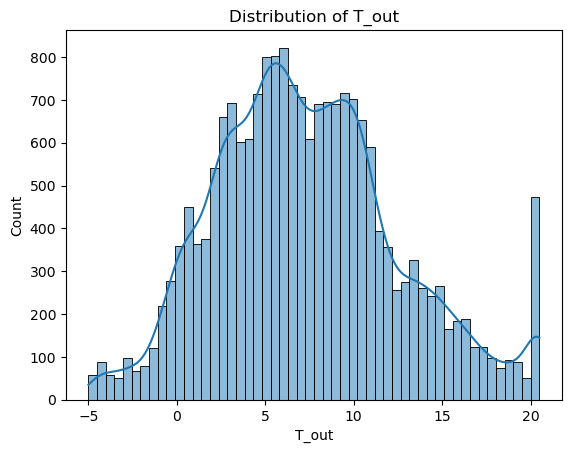

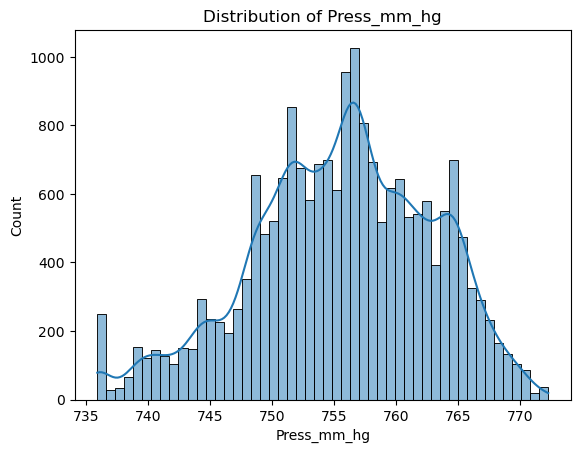

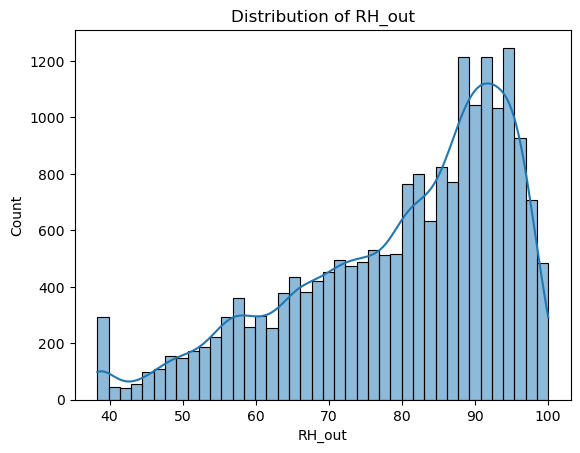

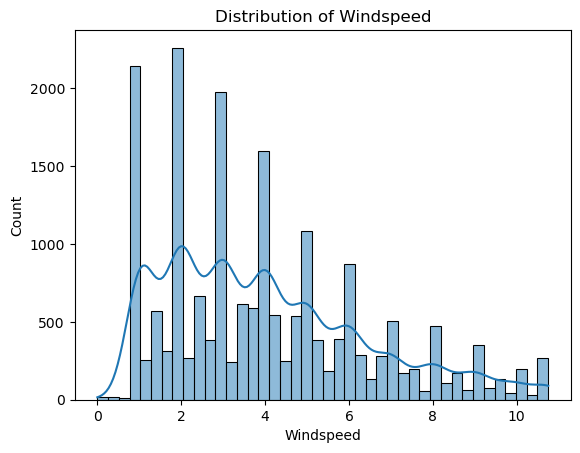

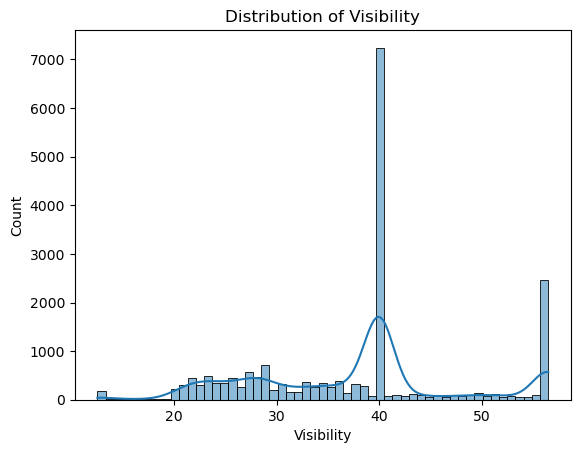

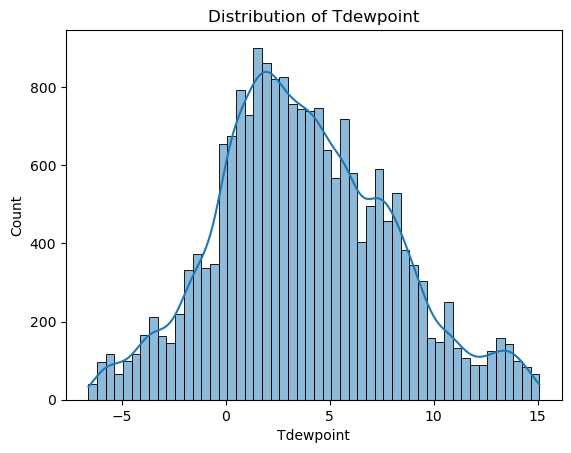

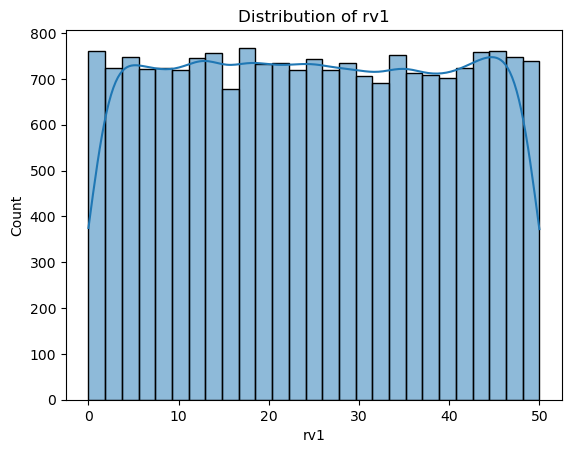

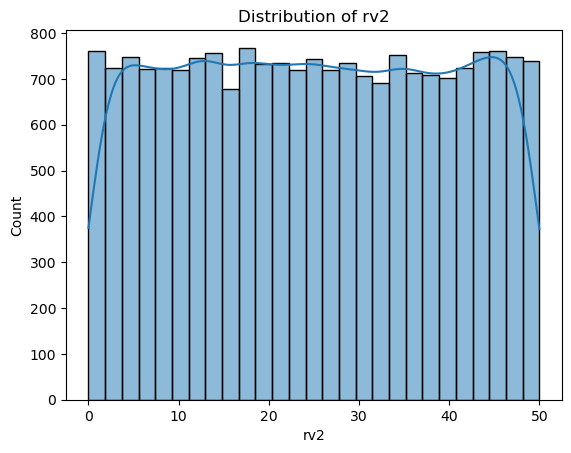

In [221]:
for i in numerical_col:
    sns.histplot(data=X, x=i, kde=True)  # kde=True adds a kernel density estimation
    plt.title(f"Distribution of {i}")
    plt.show()

## Visualizing correlation

In [223]:
cor = df_new.corr()

In [224]:
cor

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.228217,0.062176,0.277952,-0.107968,0.208305,-0.049030,0.192944,-0.025801,0.170636,...,0.150811,-0.157045,0.217903,-0.089638,-0.259220,0.101454,-0.002573,0.083616,-0.007947,-0.007947
T1,0.228217,1.000000,0.136357,0.850026,0.012534,0.895173,-0.042587,0.871745,0.087219,0.884521,...,0.837825,0.058403,0.663869,-0.164266,-0.311827,-0.071062,-0.051352,0.564622,-0.005906,-0.005906
RH_1,0.062176,0.136357,1.000000,0.258938,0.807043,0.208267,0.849710,0.075592,0.891509,0.158089,...,0.062058,0.752922,0.328144,-0.313151,0.262545,0.186269,-0.010861,0.621159,-0.001784,-0.001784
T2,0.277952,0.850026,0.258938,1.000000,-0.109497,0.730998,0.119710,0.752084,0.239189,0.715012,...,0.648233,0.148528,0.751611,-0.159559,-0.452288,0.108661,-0.045257,0.570510,-0.009996,-0.009996
RH_2,-0.107968,0.012534,0.807043,-0.109497,1.000000,0.139261,0.693148,-0.034598,0.734294,0.111733,...,0.048953,0.682846,0.083890,-0.262480,0.527418,0.041660,-0.008508,0.507909,0.006664,0.006664
T3,0.208305,0.895173,0.208267,0.730998,0.139261,1.000000,-0.033286,0.851291,0.099333,0.891221,...,0.901274,0.108545,0.674360,-0.221540,-0.264667,-0.080260,-0.075541,0.621318,-0.003906,-0.003906
RH_3,-0.049030,-0.042587,0.849710,0.119710,0.693148,-0.033286,1.000000,-0.154686,0.889211,-0.079869,...,-0.225074,0.812461,0.107075,-0.251784,0.355669,0.210022,0.021263,0.402680,-0.001359,-0.001359
T4,0.192944,0.871745,0.075592,0.752084,-0.034598,0.851291,-0.154686,1.000000,-0.058836,0.869093,...,0.883595,-0.039370,0.636983,-0.099951,-0.363746,-0.164795,-0.081039,0.502130,-0.001265,-0.001265
RH_4,-0.025801,0.087219,0.891509,0.239189,0.734294,0.099333,0.889211,-0.058836,1.000000,0.065394,...,-0.072814,0.831998,0.288595,-0.288618,0.334809,0.253407,0.005558,0.606233,-0.002395,-0.002395
T5,0.170636,0.884521,0.158089,0.715012,0.111733,0.891221,-0.079869,0.869093,0.065394,1.000000,...,0.904334,0.040286,0.617230,-0.205274,-0.253048,-0.125726,-0.058275,0.559783,-0.004900,-0.004900


<Axes: >

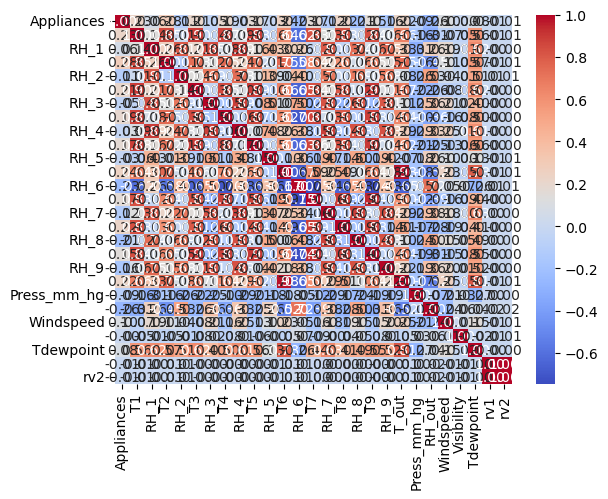

In [225]:
sns.heatmap(cor, annot= True,cmap= 'coolwarm',fmt= ".2f")

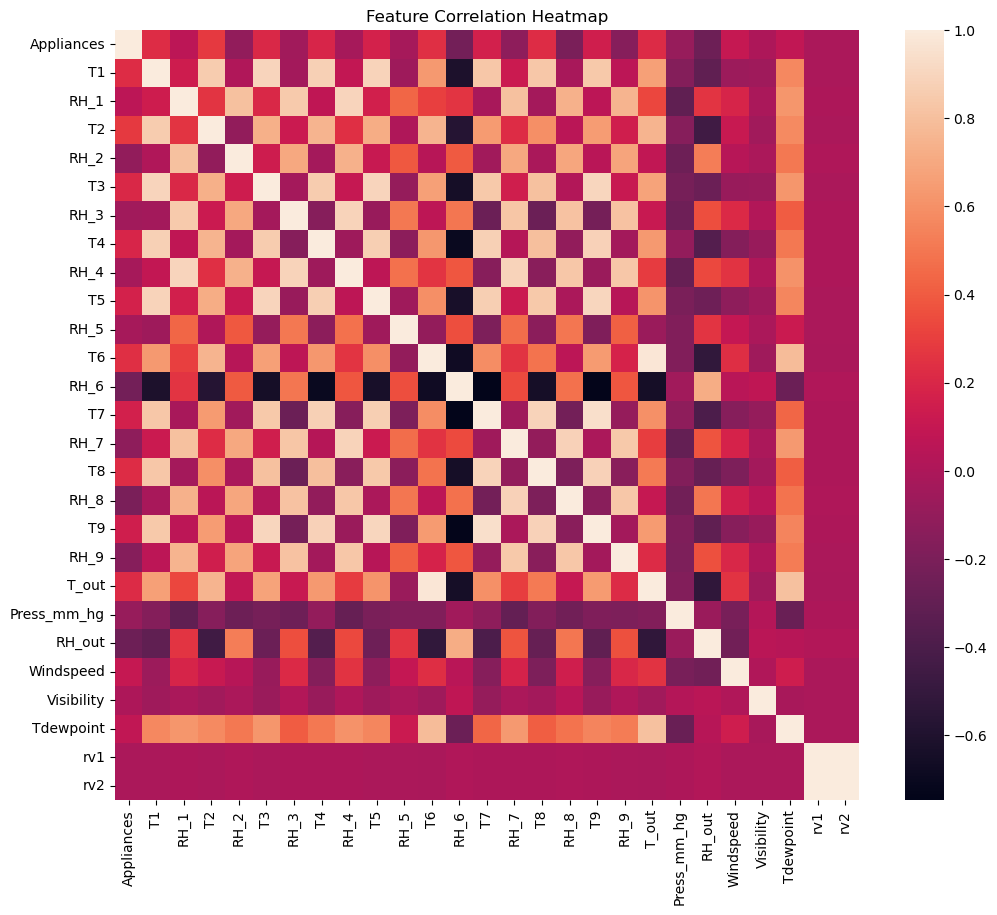

In [229]:
# Helps identify multicollinearity and relationships between variables.
# Plotting Heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(df_new.corr(), cmap='rocket', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## Target distribution

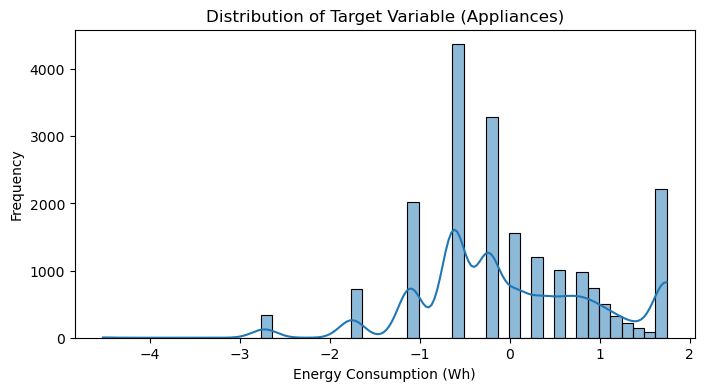

In [231]:
# Shows skewness and spread of the target variable.
# Plotting Histogram

plt.figure(figsize=(8, 4))
sns.histplot(df_new['Appliances'], bins=50, kde=True)
plt.title("Distribution of Target Variable (Appliances)")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.show()

In [233]:
from sklearn.feature_selection import SelectKBest, f_regression

In [235]:
sk = SelectKBest(score_func= f_regression, k=10 )

In [239]:
k_best = sk.fit_transform(X,y)

In [241]:
selected_features = X.columns[sk.get_support()]

In [243]:
selected_features

Index(['T1', 'T2', 'T3', 'T6', 'RH_6', 'T8', 'RH_8', 'RH_9', 'T_out',
       'RH_out'],
      dtype='object')

In [245]:
feature_score = pd.DataFrame({
    'Features' : X.columns,
    'Score' : sk.scores_}).sort_values(by= 'Score',ascending=False)

In [247]:
feature_score

,Features,Score
20,RH_out,1127.919183
2,T2,907.080097
10,T6,769.009289
18,T_out,605.324778
15,RH_8,564.661912
11,RH_6,539.681320
0,T1,431.434835
4,T3,427.227329
14,T8,371.999145
17,RH_9,291.142325


In [249]:
X_sel = X[selected_features]

In [251]:
X_sel.columns

Index(['T1', 'T2', 'T3', 'T6', 'RH_6', 'T8', 'RH_8', 'RH_9', 'T_out',
       'RH_out'],
      dtype='object')

## Feature Scaling

In [254]:
sc = StandardScaler()

In [339]:
X_scaled = sc.fit_transform(X_sel)

In [341]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)
X_train.shape

(15788, 10)

In [343]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [345]:
X_test.shape

(3947, 10)

In [347]:
y_train.shape

(15788,)

In [349]:
y_test.shape

(3947,)

## Model Training

In [352]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR()
}

In [354]:
y_train = y_train.round().astype(int)
y_test = y_test.round().astype(int)

In [356]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }

In [357]:
# Converting results into dataframe

results_df = pd.DataFrame(results).T
print(results_df)

                                      MAE          MSE       RMSE  R2 Score
Linear Regression               30.777132  1620.373906  40.253868  0.118363
Random Forest                   14.642036   491.576020  22.171514  0.732536
Gradient Boosting               26.257312  1238.371961  35.190510  0.326208
Support Vector Regressor (SVR)  28.775211  1832.601832  42.808899  0.002891


In [360]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib # To save model

In [362]:
pipeline = Pipeline([
    ('Imputer',SimpleImputer(strategy='mean')),
    ('Scaler', StandardScaler()),
     ('Model', RandomForestRegressor())
])

In [364]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('Model', RandomForestRegressor())])

In [366]:
y_pred = pipeline.predict(X_test)

In [368]:
# To Save the model and load
joblib.dump(pipeline, 'Energy Consumption Prediction of Home Appliances.joblib')

['Energy Consumption Prediction of Home Appliances.joblib']

In [370]:
# Loading the model
pipeline_loaded = joblib.load('Energy Consumption Prediction of Home Appliances.joblib')

##  Hyperparameter Tuning for Random Forest

In [373]:
# Hyperparameter tuning for the best model

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [375]:
# The best parameters and model score

y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", r2_score(y_test, y_pred_best))

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best R2 Score: 0.7361992964565326


In [387]:
features = X_sel.columns

# Get the first row of features (excluding the target column)
new_data = df_new[features].iloc[[4]]  # Double brackets keep it as a DataFrame


# Apply the same preprocessing steps as you did during training (e.g., scaling)

new_data_scaled = sc.transform(new_data)     # Scaling the data using the same scaler

# Make prediction using the trained model
predicted_result = model.predict(new_data_scaled)

# Output the prediction
print("Predicted result :", predicted_result)


Predicted result : [70.03524433]


C:\Users\amaya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
